In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

In [104]:
filepath ='/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Inception/Results_with_Village_code_BF.txt'

In [105]:
df = pd.read_csv(filepath,delim_whitespace=True, header=None)

In [107]:
df.columns = ['actual_y', 'predicted_y','village_code']

In [108]:
df['actual_y'] = df['actual_y'].astype(int)
df['predicted_y'] = df['predicted_y'].astype(int)
df['village_code'] = df['village_code'].astype(int)

In [109]:
df.head()

,actual_y,predicted_y,village_code
0,0,0,251893
1,0,0,392629
2,0,0,531900
3,0,0,522435
4,0,0,253507


In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
print(classification_report(df['actual_y'], df['predicted_y']))
print(accuracy_score(df['actual_y'], df['predicted_y']))
print(confusion_matrix(df['actual_y'], df['predicted_y']))

             precision    recall  f1-score   support

          0       0.83      1.00      0.90     32143
          1       0.00      0.00      0.00      3367
          2       0.59      0.12      0.19      4042

avg / total       0.73      0.82      0.75     39552

0.8211974110032363
[[32009     0   134]
 [ 3177     0   190]
 [ 3571     0   471]]


In [70]:
df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')

### Weighted Accuracy Score

In [1]:
# w = np.ones(y_true.shape[0])
# for idx, i in enumerate(np.bincount(y_true)):
#     w[y_true == idx] *= (i/float(y_true.shape[0]))
# print('Weighted',accuracy_score(y_true, y_pred, sample_weight=w))

from sklearn.metrics import accuracy_score
def weighted_accuracy(y_true, y_pred):
    w = np.ones(y_true.shape[0])
    for idx, i in enumerate(np.bincount(y_true)):
        w[y_true == idx] *= (i/float(y_true.shape[0]))
    print('Weighted',accuracy_score(y_true, y_pred, sample_weight=w))
    return accuracy_score(y_true, y_pred, sample_weight=w)

### Class Wise Accuracy

In [ ]:
def class_wise_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Class wise accuracy: ',cm.diagonal())
    return cm.diagonal()

### Plotting Confusion Matrix

In [4]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



-1
Confusion matrix, without normalization
[[ 3498 10727     1]
 [  889 13213     1]
 [  310  2131    18]]
Normalized confusion matrix
[[2.45887811e-01 7.54041895e-01 7.02938282e-05]
 [6.30362334e-02 9.36892860e-01 7.09068992e-05]
 [1.26067507e-01 8.66612444e-01 7.32004880e-03]]
-1
Confusion matrix, without normalization
[[17103  1711  2433]
 [ 3726  3826   557]
 [  746    61   714]]
Normalized confusion matrix
[[0.8049607  0.08052902 0.11451028]
 [0.45948946 0.47182143 0.06868911]
 [0.4904668  0.04010519 0.46942801]]
-1
Confusion matrix, without normalization
[[10678    74   829]
 [ 5293   100  1557]
 [ 6569    42  5763]]
Normalized confusion matrix
[[0.92202746 0.00638978 0.07158276]
 [0.76158273 0.01438849 0.22402878]
 [0.53087118 0.00339421 0.4657346 ]]
-1
Confusion matrix, without normalization
[[25255     0     0]
 [ 2575     0     0]
 [ 2919     0     1]]
Normalized confusion matrix
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 

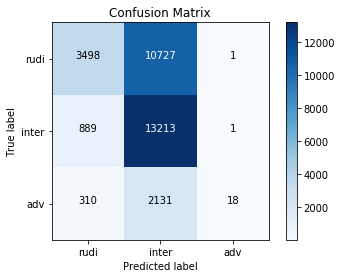

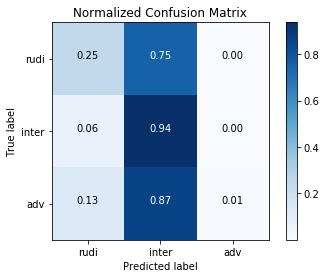

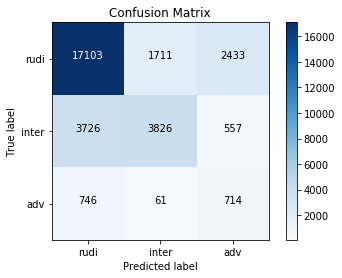

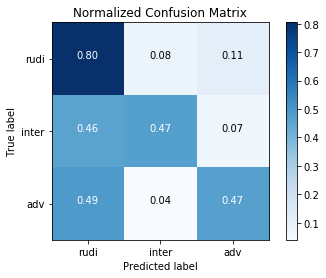

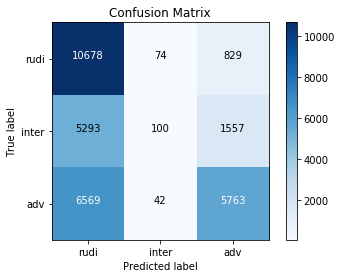

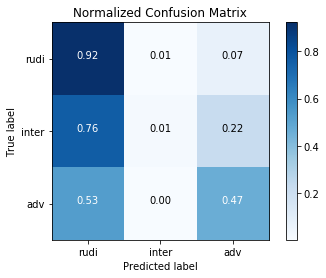

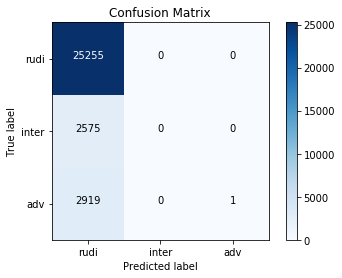

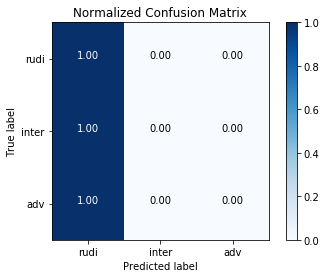

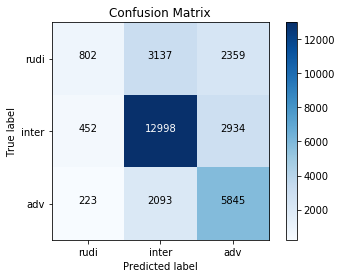

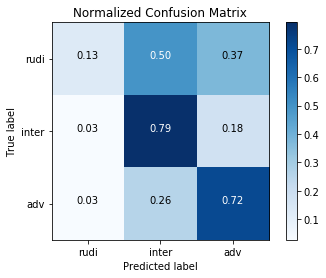

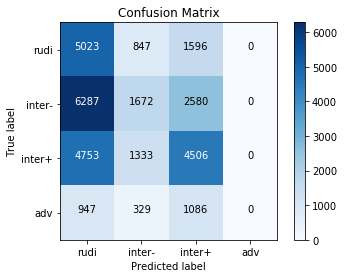

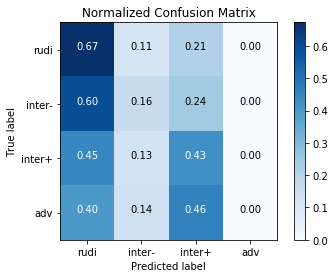

In [29]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Inception 2'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print(label.find('CHH'))
            if (label.find('CHH')>0):
                print(label.find('CHH'))
                class_names=['rudi', 'inter-','inter+', 'adv']
                cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=False,title='Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                file_path_new_2 = os.path.join(dir_path,(label+'_NCM.png'))
            
                plt.savefig(file_path_new)
            
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=True,title='Normalized Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                plt.savefig(file_path_new_2)
            else:
                class_names=['rudi', 'inter', 'adv']
                cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=False,title='Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                file_path_new_2 = os.path.join(dir_path,(label+'_NCM.png'))
            
                plt.savefig(file_path_new)
            
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=True,title='Normalized Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                plt.savefig(file_path_new_2)
            

In [ ]:
#For classification report and accuracy score

In [26]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Resnet50'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_CHH', ' :', 0.45368779576212437)
('Classification Report for ', 'Results_ResNet_CHH')
             precision    recall  f1-score   support

          0       0.53      0.15      0.23      8034
          1       0.43      0.53      0.47     11331
          2       0.46      0.70      0.56     11304
          3       0.00      0.00      0.00      2508

avg / total       0.43      0.45      0.41     33177

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_EMP', ' :', 0.6564107218490954)
('Classification Report for ', 'Results_ResNet_EMP')
             precision    recall  f1-score   support

          0       0.72      0.59      0.65     15273
          1       0.62      0.82      0.70     15108
          2       0.67      0.09      0.16      2673

avg / total       0.67      0.66      0.64     33054

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_MSL', ' :', 0.6480

In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Inception 2'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_EMP', ' :', 0.5433610497596466)
('Classification Report for ', 'Results_EMP')
             precision    recall  f1-score   support

          0       0.74      0.25      0.37     14226
          1       0.51      0.94      0.66     14103
          2       0.90      0.01      0.01      2459

avg / total       0.65      0.54      0.47     30788

-----------------------------------------------------------
('Accuracy for ', 'Results_FC', ' :', 0.7009424490721249)
('Classification Report for ', 'Results_FC')
             precision    recall  f1-score   support

          0       0.79      0.80      0.80     21247
          1       0.68      0.47      0.56      8109
          2       0.19      0.47      0.27      1521

avg / total       0.73      0.70      0.71     30877

-----------------------------------------------------------
('Accuracy for ', 'Results_MSL', ' :', 0.5352208380520951)
('Classification Report for ', 'Results_MSL')
             precision    recal

In [30]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel ResNetFullData'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_CHH', ' :', 0.43936687811787895)
('Classification Report for ', 'Results_ResNet_CHH')
             precision    recall  f1-score   support

          0       0.50      0.17      0.26      7765
          1       0.41      0.53      0.46     10862
          2       0.46      0.63      0.53     11263
          3       0.00      0.00      0.00      2584

avg / total       0.41      0.44      0.40     32474

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_EMP', ' :', 0.6478105561372175)
('Classification Report for ', 'Results_ResNet_EMP')
             precision    recall  f1-score   support

          0       0.64      0.71      0.67     15147
          1       0.65      0.68      0.67     14865
          2       0.59      0.10      0.18      2462

avg / total       0.64      0.65      0.63     32474

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_MSL', ' :', 0.6781

In [31]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel_Augmented'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_BF', ' :', 0.7162037322165424)
('Classification Report for ', 'Results_ResNet_BF')
             precision    recall  f1-score   support

          0       0.84      0.84      0.84     26699
          1       0.13      0.08      0.10      2804
          2       0.13      0.16      0.14      2971

avg / total       0.71      0.72      0.71     32474

-----------------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel_ResNet_weights'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_BF', ' :', 0.7986540724869481)
('Classification Report for ', 'Results_ResNet_BF')
             precision    recall  f1-score   support

          0       0.87      0.92      0.90     27166
          1       0.00      0.00      0.00      2782
          2       0.31      0.42      0.36      3189

avg / total       0.75      0.80      0.77     33137

-----------------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/Resnet/chh'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Test_Results_CHH-01', ' :', 0.4418333228187496)
('Classification Report for ', 'Test_Results_CHH-01')
             precision    recall  f1-score   support

          0       0.56      0.09      0.16      7693
          1       0.40      0.64      0.49     10622
          2       0.48      0.60      0.53     10897
          3       0.00      0.00      0.00      2490

avg / total       0.44      0.44      0.39     31702

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_CHH-03', ' :', 0.4367547788783042)
('Classification Report for ', 'Test_Results_CHH-03')
             precision    recall  f1-score   support

          0       0.50      0.11      0.19      7693
          1       0.42      0.52      0.46     10622
          2       0.44      0.69      0.54     10897
          3       0.00      0.00      0.00      2490

avg / total       0.41      0.44      0.39     31702

--------------------------------------------------------

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.45      0.24      0.31      7693
          1       0.42      0.47      0.44     10622
          2       0.46      0.66      0.54     10897
          3       0.00      0.00      0.00      2490

avg / total       0.41      0.44      0.41     31702

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_CHH-02', ' :', 0.44230647908649295)
('Classification Report for ', 'Test_Results_CHH-02')
             precision    recall  f1-score   support

          0       0.53      0.10      0.17      7693
          1       0.41      0.58      0.48     10622
          2       0.47      0.65      0.54     10897
          3       0.00      0.00      0.00      2490

avg / total       0.43      0.44      0.39     31702

-----------------------------------------------------------


In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/inceptionv3/msw'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Test_Results_MSW-02', ' :', 0.6529491589610882)
('Classification Report for ', 'Test_Results_MSW-02')
             precision    recall  f1-score   support

          0       0.55      0.20      0.29      6427
          1       0.70      0.82      0.76     17084
          2       0.57      0.66      0.61      8176

avg / total       0.64      0.65      0.63     31687

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_MSW-01', ' :', 0.6508031684918105)
('Classification Report for ', 'Test_Results_MSW-01')
             precision    recall  f1-score   support

          0       0.57      0.17      0.26      6427
          1       0.71      0.81      0.76     17084
          2       0.55      0.69      0.62      8176

avg / total       0.64      0.65      0.62     31687

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_MSW-04', ' :', 0.6505506990248366)
('Classification Report for ', 'Tes

In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/inceptionv3/emp'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Test_Results_EMP-01', ' :', 0.6676648594124323)
('Classification Report for ', 'Test_Results_EMP-01')
             precision    recall  f1-score   support

          0       0.70      0.69      0.69     14698
          1       0.64      0.77      0.70     14292
          2       0.00      0.00      0.00      2734

avg / total       0.61      0.67      0.64     31724

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_EMP-00', ' :', 0.6680431219266171)
('Classification Report for ', 'Test_Results_EMP-00')
             precision    recall  f1-score   support

          0       0.70      0.69      0.69     14698
          1       0.64      0.78      0.70     14292
          2       0.00      0.00      0.00      2734

avg / total       0.61      0.67      0.64     31724

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_EMP-04', ' :', 0.6521560963308536)
('Classification Report for ', 'Tes

In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/Resnetweights/BF'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            print(f1sc)

('Accuracy for ', 'Test_Results_BF', ' :', 0.7268750196707897)
('Classification Report for ', 'Test_Results_BF')
             precision    recall  f1-score   support

          0       0.90      0.80      0.85     26037
          1       0.21      0.47      0.29      2659
          2       0.38      0.34      0.36      3077

avg / total       0.79      0.73      0.75     31773

-----------------------------------------------------------
0.7268750196707897


In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/Resnetweights/MSW'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            print(f1sc)

('Accuracy for ', 'Test_Results_MSW-02', ' :', 0.634866033389087)
('Classification Report for ', 'Test_Results_MSW-02')
             precision    recall  f1-score   support

          0       0.42      0.55      0.47      6427
          1       0.84      0.62      0.71     17084
          2       0.56      0.74      0.64      8176

avg / total       0.68      0.63      0.65     31687

-----------------------------------------------------------
0.634866033389087
('Accuracy for ', 'Test_Results_MSW-01', ' :', 0.621327358222615)
('Classification Report for ', 'Test_Results_MSW-01')
             precision    recall  f1-score   support

          0       0.41      0.54      0.47      6427
          1       0.86      0.58      0.69     17084
          2       0.54      0.77      0.63      8176

avg / total       0.69      0.62      0.63     31687

-----------------------------------------------------------
0.621327358222615
('Accuracy for ', 'Test_Results_MSW-04', ' :', 0.5767349386183609)
(

In [14]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\Sentinel Inception 2"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            #print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy for  Results_BF  : 0.8213333333333334
Class wise accuracy:  [1.00000000e+00 0.00000000e+00 3.42465753e-04]
Weighted 0.9767921077173212
Classification Report for  Results_BF
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     25255
           1       0.00      0.00      0.00      2575
           2       1.00      0.00      0.00      2920

   micro avg       0.82      0.82      0.82     30750
   macro avg       0.61      0.33      0.30     30750
weighted avg       0.77      0.82      0.74     30750

-----------------------------------------------------------


c:\users\ajain7\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy for  Results_CHH  : 0.3618010917665299
Class wise accuracy:  [0.67278328 0.15864883 0.42541541 0.        ]
Weighted 0.3614099716395517
Classification Report for  Results_CHH
              precision    recall  f1-score   support

           0       0.30      0.67      0.41      7466
           1       0.40      0.16      0.23     10539
           2       0.46      0.43      0.44     10592
           3       0.00      0.00      0.00      2362

   micro avg       0.36      0.36      0.36     30959
   macro avg       0.29      0.31      0.27     30959
weighted avg       0.37      0.36      0.33     30959

-----------------------------------------------------------
Accuracy for  Results_EMP  : 0.5433610497596466
Class wise accuracy:  [0.24588781 0.93689286 0.00732005]
Weighted 0.5797641579257542
Classification Report for  Results_EMP
              precision    recall  f1-score   support

           0       0.74      0.25      0.37     14226
           1       0.51      0.94      0.

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\InceptionweightsResults"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            #print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy for  Test_Results_BF-00  : 0.6474050294275013
Class wise accuracy:  [0.70234666 0.64272283 0.18654534]
Weighted Accuracy -  0.6947074873166245
Classification Report for  Test_Results_BF-00
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     26037
           1       0.17      0.64      0.27      2659
           2       0.40      0.19      0.25      3077

   micro avg       0.65      0.65      0.65     31773
   macro avg       0.49      0.51      0.44     31773
weighted avg       0.79      0.65      0.70     31773

-----------------------------------------------------------
Accuracy for  Test_Results_BF-01  : 0.6316054511692317
Class wise accuracy:  [0.67016169 0.61978187 0.31556711]
Weighted Accuracy -  0.6648144351426095
Classification Report for  Test_Results_BF-01
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     26037
           1       0.16      0.62      0.26      2659


Accuracy for  Test_Results_FC-02  : 0.6545781082613902
Class wise accuracy:  [0.59994473 0.8275821  0.48951911]
Weighted Accuracy -  0.6289290786277915
Classification Report for  Test_Results_FC-02
              precision    recall  f1-score   support

           0       0.88      0.60      0.71     21712
           1       0.54      0.83      0.65      8404
           2       0.20      0.49      0.28      1622

   micro avg       0.65      0.65      0.65     31738
   macro avg       0.54      0.64      0.55     31738
weighted avg       0.76      0.65      0.68     31738

-----------------------------------------------------------
Accuracy for  Test_Results_FC-03  : 0.6581385090427878
Class wise accuracy:  [0.60482682 0.82044265 0.53082614]
Weighted Accuracy -  0.6324282787769374
Classification Report for  Test_Results_FC-03
              precision    recall  f1-score   support

           0       0.89      0.60      0.72     21712
           1       0.56      0.82      0.66      8404


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Resnetweights\FC"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            #print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy for  Test_Results_FC-00  : 0.6430146827147268
Class wise accuracy:  [0.59275976 0.78914802 0.55856967]
Weighted Accuracy -  0.6180602766181806
Classification Report for  Test_Results_FC-00
              precision    recall  f1-score   support

           0       0.88      0.59      0.71     21712
           1       0.58      0.79      0.67      8404
           2       0.16      0.56      0.25      1622

   micro avg       0.64      0.64      0.64     31738
   macro avg       0.54      0.65      0.54     31738
weighted avg       0.76      0.64      0.67     31738

-----------------------------------------------------------
Accuracy for  Test_Results_FC-01  : 0.6577604133845864
Class wise accuracy:  [0.6052874  0.81461209 0.54747226]
Weighted Accuracy -  0.6321512628501795
Classification Report for  Test_Results_FC-01
              precision    recall  f1-score   support

           0       0.89      0.61      0.72     21712
           1       0.56      0.81      0.66      8404


In [7]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Resnetweights\MSL"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy for  Test_Results_MSL-00  : 0.6895921326356931
Normal 0.6895921326356931
Class wise accuracy:  [0.81349539 0.31869547 0.77664975]
Weighted Accuracy -  0.7283962716964762
Classification Report for  Test_Results_MSL-00
              precision    recall  f1-score   support

           0       0.71      0.81      0.76     11930
           1       0.47      0.32      0.38      6991
           2       0.75      0.78      0.76     12805

   micro avg       0.69      0.69      0.69     31726
   macro avg       0.64      0.64      0.63     31726
weighted avg       0.67      0.69      0.68     31726

-----------------------------------------------------------
Accuracy for  Test_Results_MSL-01  : 0.6889302149656433
Normal 0.6889302149656433
Class wise accuracy:  [0.73336127 0.36589901 0.82389692]
Weighted Accuracy -  0.7245923569826189
Classification Report for  Test_Results_MSL-01
              precision    recall  f1-score   support

           0       0.76      0.73      0.75     1193

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Resnetweights\BF"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy for  Test_Results_BF-00  : 0.6328329084442765
Normal 0.6328329084442765
Class wise accuracy:  [0.66509198 0.60248214 0.38609035]
Weighted Accuracy -  0.6606508057062558
Classification Report for  Test_Results_BF-00
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     26037
           1       0.17      0.60      0.26      2659
           2       0.35      0.39      0.37      3077

   micro avg       0.63      0.63      0.63     31773
   macro avg       0.48      0.55      0.47     31773
weighted avg       0.80      0.63      0.69     31773

-----------------------------------------------------------
Accuracy for  Test_Results_BF-01  : 0.6387498819752621
Normal 0.6387498819752621
Class wise accuracy:  [0.6713139  0.65174878 0.3519662 ]
Weighted Accuracy -  0.6667609000701821
Classification Report for  Test_Results_BF-01
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     26037
  

In [3]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.pyplot as plt
# Confusion matrix code
from sklearn.metrics import confusion_matrix
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('')
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Resnetweights\all"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            
            w = np.ones(df1['actual_y'].shape[0])
            print(w)
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            class_names=['Level-0','Level-1','Level-2']
            plot_confusion_matrix(cm,classes=class_names, normalize=True, title=label[13:])
            plt.show()
            #plt.savefig(label[13:] + '_Normalized.jpg')
            plot_confusion_matrix(cm,classes=class_names, normalize=False, title=label[13:])
            plt.show()
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy for  Test_Results_BF-00  : 0.6328329084442765
Normal 0.6328329084442765
Class wise accuracy:  [0.66509198 0.60248214 0.38609035]
[1. 1. 1. ... 1. 1. 1.]
Weighted Accuracy -  0.6606508057062558
Classification Report for  Test_Results_BF-00
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     26037
           1       0.17      0.60      0.26      2659
           2       0.35      0.39      0.37      3077

   micro avg       0.63      0.63      0.63     31773
   macro avg       0.48      0.55      0.47     31773
weighted avg       0.80      0.63      0.69     31773



NameError: name 'plot_confusion_matrix' is not defined

### AUROC

In [3]:
import matplotlib.pyplot as plt
# Confusion matrix code
from sklearn.metrics import confusion_matrix
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('')
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

Accuracy Score -------------------------
Accuracy for  Test_Results_ASSETS-00  : 0.5421599267607412
Normal 0.5421599267607412
Class wise accuracy:  [0.6275754  0.41604989 0.71574074]
Weighted Accuracy -  0.5175874346310289
F1 Score -------------------------
Classification Report for  Test_Results_ASSETS-00
              precision    recall  f1-score   support

           0       0.61      0.63      0.62     12765
           1       0.62      0.42      0.50     14592
           2       0.36      0.72      0.48      4320

   micro avg       0.54      0.54      0.54     31677
   macro avg       0.53      0.59      0.53     31677
weighted avg       0.58      0.54      0.54     31677

AUROC -------------------------
AUROC:  0.6770903006995104
Confusion Matrix -------------------------


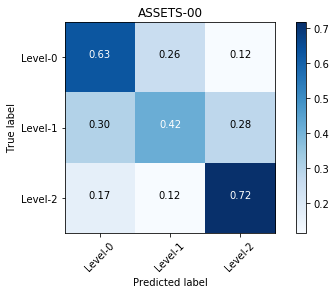

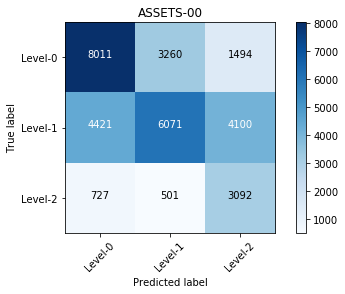

###################################################################################
Accuracy Score -------------------------
Accuracy for  Test_Results_ASSETS-01  : 0.5695615115067715
Normal 0.5695615115067715
Class wise accuracy:  [0.65969448 0.45847039 0.67847222]
Weighted Accuracy -  0.5519838996726086
F1 Score -------------------------
Classification Report for  Test_Results_ASSETS-01
              precision    recall  f1-score   support

           0       0.61      0.66      0.63     12765
           1       0.63      0.46      0.53     14592
           2       0.40      0.68      0.50      4320

   micro avg       0.57      0.57      0.57     31677
   macro avg       0.55      0.60      0.56     31677
weighted avg       0.59      0.57      0.57     31677

AUROC -------------------------
AUROC:  0.6875804576579571
Confusion Matrix -------------------------


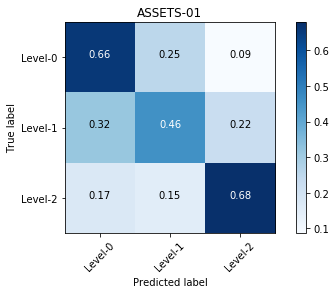

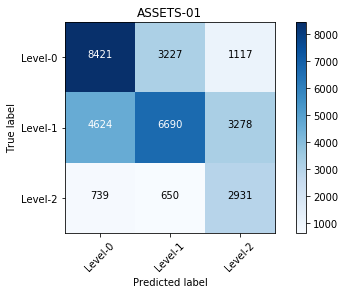

###################################################################################
Accuracy Score -------------------------
Accuracy for  Test_Results_ASSETS-02  : 0.5782744578085046
Normal 0.5782744578085046
Class wise accuracy:  [0.65248727 0.48670504 0.66828704]
Weighted Accuracy -  0.5637634749477883
F1 Score -------------------------
Classification Report for  Test_Results_ASSETS-02
              precision    recall  f1-score   support

           0       0.62      0.65      0.63     12765
           1       0.63      0.49      0.55     14592
           2       0.41      0.67      0.51      4320

   micro avg       0.58      0.58      0.58     31677
   macro avg       0.55      0.60      0.57     31677
weighted avg       0.60      0.58      0.58     31677

AUROC -------------------------
AUROC:  0.6907768823388807
Confusion Matrix -------------------------


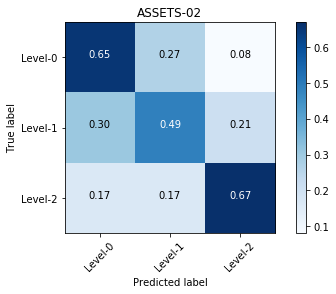

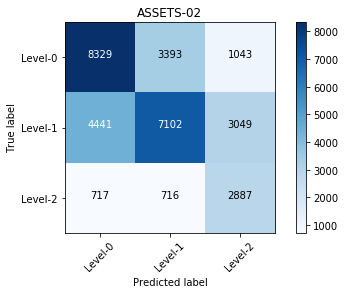

###################################################################################
Accuracy Score -------------------------
Accuracy for  Test_Results_ASSETS-03  : 0.5715503362060801
Normal 0.5715503362060801
Class wise accuracy:  [0.60767724 0.50548246 0.68796296]
Weighted Accuracy -  0.5563213499657821
F1 Score -------------------------
Classification Report for  Test_Results_ASSETS-03
              precision    recall  f1-score   support

           0       0.63      0.61      0.62     12765
           1       0.63      0.51      0.56     14592
           2       0.39      0.69      0.50      4320

   micro avg       0.57      0.57      0.57     31677
   macro avg       0.55      0.60      0.56     31677
weighted avg       0.60      0.57      0.58     31677

AUROC -------------------------
AUROC:  0.6889654287073084
Confusion Matrix -------------------------


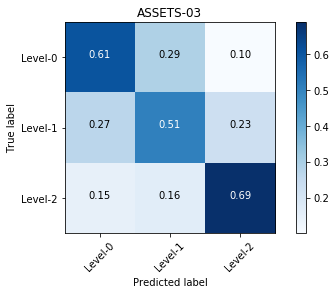

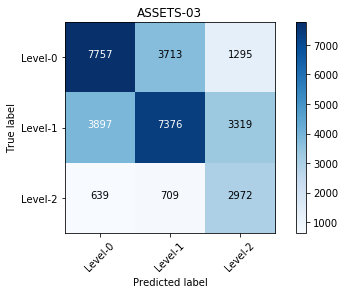

###################################################################################
Accuracy Score -------------------------
Accuracy for  Test_Results_ASSETS-04  : 0.5805158316759794
Normal 0.5805158316759794
Class wise accuracy:  [0.63509597 0.5225466  0.6150463 ]
Weighted Accuracy -  0.5734056987912141
F1 Score -------------------------
Classification Report for  Test_Results_ASSETS-04
              precision    recall  f1-score   support

           0       0.62      0.64      0.63     12765
           1       0.63      0.52      0.57     14592
           2       0.42      0.62      0.50      4320

   micro avg       0.58      0.58      0.58     31677
   macro avg       0.55      0.59      0.56     31677
weighted avg       0.59      0.58      0.58     31677

AUROC -------------------------
AUROC:  0.6841360583319505
Confusion Matrix -------------------------


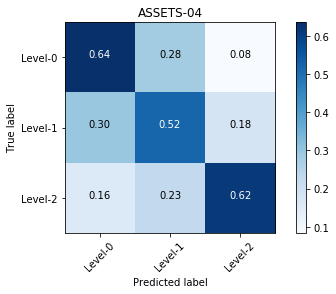

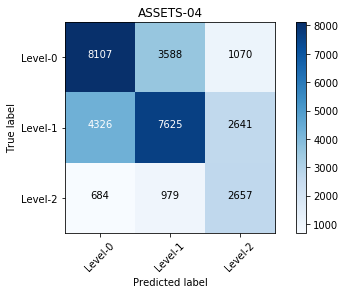

###################################################################################


In [7]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\Downloads\test_results"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy Score -------------------------')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            
            print('F1 Score -------------------------')
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            
            print('AUROC -------------------------')
            #false_positive_rate, true_positive_rate, thresholds = roc_curve(df1['actual_y'], df1['predicted_y'])
            #print ('auc: ',auc(false_positive_rate, true_positive_rate))
            #print('roc_auc_score: ', roc_auc_score(df1['actual_y'], df1['predicted_y']))
            print('AUROC: ',multiclass_roc_auc_score(df1['actual_y'], df1['predicted_y']))
            
            
            print('Confusion Matrix -------------------------')
            # Confusion Matrix
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            class_names=['Level-0','Level-1','Level-2']
            plot_confusion_matrix(cm,classes=class_names, normalize=True, title=label[13:])
            plt.show()
            #plt.savefig(label[13:] + '_Normalized.jpg')
            plot_confusion_matrix(cm,classes=class_names, normalize=False, title=label[13:])
            plt.show()
            
            
            print('###################################################################################')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

In [ ]:
# Checking high precision

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Resnetweights\all"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy Score -------------------------')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('F1 Score -------------------------')
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
                     
            '''
            print('Confusion Matrix -------------------------')
            # Confusion Matrix
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            class_names=['Level-0','Level-1','Level-2']
            plot_confusion_matrix(cm,classes=class_names, normalize=True, title=label[13:])
            plt.show()
            #plt.savefig(label[13:] + '_Normalized.jpg')
            plot_confusion_matrix(cm,classes=class_names, normalize=False, title=label[13:])
            plt.show()
            '''
            print('###################################################################################')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy Score -------------------------
Accuracy for  Test_Results_BF-04  : 0.7268750196707897
Normal 0.7268750196707897
Class wise accuracy:  [0.79867112 0.46671681 0.3441664 ]
Weighted Accuracy -  0.7890950563442003
F1 Score -------------------------
Classification Report for  Test_Results_BF-04
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     26037
           1       0.21      0.47      0.29      2659
           2       0.38      0.34      0.36      3077

   micro avg       0.73      0.73      0.73     31773
   macro avg       0.50      0.54      0.50     31773
weighted avg       0.79      0.73      0.75     31773

###################################################################################
Accuracy Score -------------------------
Accuracy for  Test_Results_EMP-02  : 0.6466082461228092
Normal 0.6466082461228092
Class wise accuracy:  [0.58293645 0.76056535 0.39319678]
Weighted Accuracy -  0.6644397654926455
F1 Score ------

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Village - Resnetweights\BF"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            
            print('Accuracy Score -------------------------')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Normal',accuracy_score(df1['actual_y'], df1['predicted_y']))
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Class wise accuracy: ',cm.diagonal())
            
            w = np.ones(df1['actual_y'].shape[0])
            for idx, i in enumerate(np.bincount(df1['actual_y'])):
                w[df1['actual_y'] == idx] *= (i/float(df1['actual_y'].shape[0]))
            print('Weighted Accuracy - ',accuracy_score(df1['actual_y'], df1['predicted_y'], sample_weight=w))
            
            print('F1 Score -------------------------')
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
                     
            '''
            print('Confusion Matrix -------------------------')
            # Confusion Matrix
            cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
            class_names=['Level-0','Level-1','Level-2']
            plot_confusion_matrix(cm,classes=class_names, normalize=True, title=label[13:])
            plt.show()
            #plt.savefig(label[13:] + '_Normalized.jpg')
            plot_confusion_matrix(cm,classes=class_names, normalize=False, title=label[13:])
            plt.show()
            '''
            print('###################################################################################')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            #print(f1sc)

Accuracy Score -------------------------
Accuracy for  Test_Results_BF-00  : 0.6328329084442765
Normal 0.6328329084442765
Class wise accuracy:  [0.66509198 0.60248214 0.38609035]
Weighted Accuracy -  0.6606508057062558
F1 Score -------------------------
Classification Report for  Test_Results_BF-00
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     26037
           1       0.17      0.60      0.26      2659
           2       0.35      0.39      0.37      3077

   micro avg       0.63      0.63      0.63     31773
   macro avg       0.48      0.55      0.47     31773
weighted avg       0.80      0.63      0.69     31773

###################################################################################
Accuracy Score -------------------------
Accuracy for  Test_Results_BF-01  : 0.6387498819752621
Normal 0.6387498819752621
Class wise accuracy:  [0.6713139  0.65174878 0.3519662 ]
Weighted Accuracy -  0.6667609000701821
F1 Score -------